## Distance and multi-dimensional scaling (MDS)

In [134]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

from sklearn.neighbors import DistanceMetric
from sklearn.manifold import MDS

### Data

Counts of four different species from three different sites (sites u, v, and q). 

"Toy" data set constructed to illustrate distance calculations and multidimensional scaling.

In [135]:
u = [415,200,310,411]
v = [615,100,330,203]
q = [614,101,331,202]

*In-class Problem:* Compute Bray-Curtis distance between two sites.

$$ d = \frac{\sum |u_i - v_i|}{\sum(u_i + v_i)} $$

Which two sites will have the smallest distance?

Create one 2D array from the three 1D arrays.

In [136]:
data = np.array([u,v,q])

In [137]:
data

array([[415, 200, 310, 411],
       [615, 100, 330, 203],
       [614, 101, 331, 202]])

#### Compute Bray-Curtis distance

##### Method 1: SciPy

In [138]:
dist = distance.pdist(data,'braycurtis')

In [139]:
dist

array([0.20433437, 0.20433437, 0.00160256])

In [140]:
distmatrix = distance.squareform(dist)

In [141]:
distmatrix

array([[0.        , 0.20433437, 0.20433437],
       [0.20433437, 0.        , 0.00160256],
       [0.20433437, 0.00160256, 0.        ]])

##### Method 2: scikit-learn

In [142]:
distmetric = DistanceMetric.get_metric('braycurtis')
dist2 = distmetric.pairwise(data)
dist2

array([[0.        , 0.20433437, 0.20433437],
       [0.20433437, 0.        , 0.00160256],
       [0.20433437, 0.00160256, 0.        ]])

#### Multi-dimensional scaling (MDS)

Metric and non-metric MDS

In [143]:
metric_MDS = MDS(n_components=2, dissimilarity ='precomputed', metric=True)
nonmetric_MDS = MDS(n_components=2, dissimilarity ='precomputed', metric=False)

all_MDS = metric_MDS.fit_transform(dist2)
all_nMDS = nonmetric_MDS.fit_transform(dist2)

In [144]:
all_MDS

array([[-0.06757764, -0.11827113],
       [ 0.03272916,  0.05974104],
       [ 0.03484849,  0.05853009]])

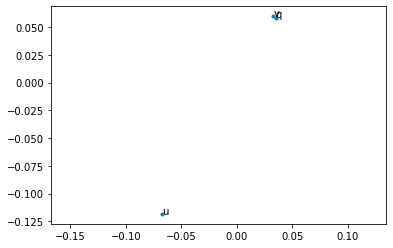

In [145]:
plt.figure()
plt.plot(all_MDS[:,0],all_MDS[:,1],'.')
plt.gca().axis('equal')

# labels, only include if necessary
for i,label in enumerate(['u','v','q']):
    plt.text(all_MDS[i,0],all_MDS[i,1],label)

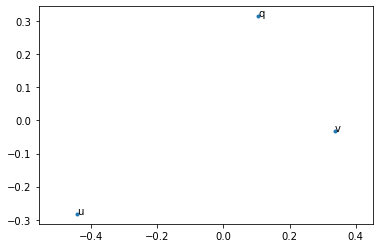

In [146]:
plt.figure()
plt.plot(all_nMDS[:,0],all_nMDS[:,1],'.')
plt.gca().axis('equal')

for i,label in enumerate(['u','v','q']):
    plt.text(all_nMDS[i,0],all_nMDS[i,1],label)